In [1]:
import numpy as np
import os
import h5py
import pandas as pd
from PIL import Image as im

In [2]:
f = h5py.File("Electron.hdf5", "r")
g = h5py.File("Photon.hdf5","r")

In [3]:
f.keys()
g.keys()

<KeysViewHDF5 ['X', 'y']>

In [158]:
electron = np.asarray(f['X'])
photon = np.asarray(g['X'])


In [728]:
channel1_elect = (electron[:,:,:,0] - electron[:,:,:,0].min())/(electron[:,:,:,0].max() - electron[:,:,:,0].min()) 
channel2_elect = (electron[:,:,:,1] - electron[:,:,:,1].min())/(electron[:,:,:,1].max() - electron[:,:,:,1].min())
channel1_phot = (photon[:,:,:,0] - photon[:,:,:,0].min())/(photon[:,:,:,0].max() - photon[:,:,:,0].min()) 
channel2_phot = (photon[:,:,:,1] - photon[:,:,:,1].min())/(photon[:,:,:,1].max() - photon[:,:,:,1].min())


In [736]:
channel1_elect_reshaped = np.reshape(channel1_elect, (-1, (32*32)))
channel2_elect_reshaped = np.reshape(channel2_elect, (-1, (32*32)))
channel1_phot_reshaped = np.reshape(channel1_phot, (-1, (32*32)))
channel2_phot_reshaped = np.reshape(channel2_phot, (-1, (32*32)))
elect_reshaped = np.concatenate([channel1_elect_reshaped,channel2_elect_reshaped], axis = -1)
phot_reshaped = np.concatenate([channel1_phot_reshaped,channel2_phot_reshaped], axis = -1)

In [749]:
elect_reshaped = elect_reshaped * 255
phot_reshaped = phot_reshaped * 255
elect_reshaped = elect_reshaped.astype(np.uint8)
phot_reshaped = phot_reshaped.astype(np.uint8)

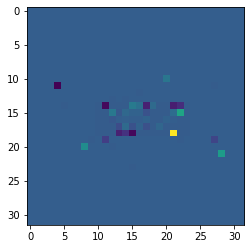

In [761]:
plt.imshow(np.reshape(elect_reshaped[3,1024:2048],(32,32)))

In [763]:
electron_clean = np.zeros((elect_reshaped.shape[0],2049) ,dtype = np.uint8 )
photon_clean = np.zeros((phot_reshaped.shape[0],2049) ,dtype = np.uint8 )
electron_clean[:,2048] = 1
photon_clean[:,2048] = 0
electron_clean[:,:2048] = elect_reshaped
photon_clean[:,:2048] = phot_reshaped

In [772]:
data = np.concatenate([electron_clean,photon_clean], axis = 0)
np.random.shuffle(data)

In [783]:
np.save("Dataset_Experiment.npy", data)

In [784]:
data.shape

(498000, 2049)